In [95]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
from sklearn.model_selection import train_test_split

from scipy.optimize import leastsq

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
def info(df, head=True):
    print("Type: ", type(df))
    print("Shape: ", df.shape)
    print("Columns: ", df.columns)
    if head:
        display(df.head())
    else:
        display(df)

def corr_vis(df, features, meas='AVERAGEKWH_raw'):
    '''
    Displays a corrrelation chart for the  specified features in the edf
    '''
    ## Create a blank dataframe that calculates all the correlations to TOG
    vis = pd.DataFrame()
    vis['feature'] = features
    vis['spearman'] = [df[f].corr(df[meas], 'spearman') for f in features]
    #[print(str(features[f]) + ": " + str(spr['spearman'][f])) for f in range(len(features))]
    
    vis = vis.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    ax = sns.barplot(data=vis, y='feature', x='spearman', orient='h')
    
    ## Chart design
    ax.set(xlabel='correlation')
    ax.set(title='Correlation of all features to {meas}'.format(meas=meas)) 
    return vis

# Importing GeoDataFrames

California Counties and Boundarise sourced from https://data.ca.gov/dataset/ca-geographic-boundaries

In [5]:
!ls

Cleaning PGE.ipynb                      README.md
Collect NREL Solar Radiation DB.ipynb   Transforming all pge and nrel .ipynb
Combining PG&E.ipynb                    Untitled.ipynb
EDA PGE.ipynb                           Visualizations.ipynb
EDA and Modeling PGE.ipynb              __pycache__
Loading NREL and PG&E Data Sample.ipynb cleaned_data
Merging Data.ipynb                      config
Modeling-2-2.ipynb                      data
Modeling-2.ipynb                        index.html
Modeling.ipynb                          results


In [ ]:
base = "/datasets/team-red-residential-energy-consumption/datasets/team-red-residential-energy-consumption/Data/"

In [3]:
cleaned_monthly_with_zip_and_citis_fn = "cleaned_data/all-pge-with-nrel/transformed_pge-energy-consumption-with-nrel-solar_2013-2019_136968x35.shp"
zip_cities_monthly_pge_gdf = gpd.read_file(cleaned_monthly_with_zip_and_citis_fn)


KeyboardInterrupt: 

In [26]:
zip_cities_monthly_pge_gdf.shape

(136968, 36)

In [4]:
zip_cities_monthly_pge_gdf = pd.read_csv("cleaned_data/all-pge-with-nrel.csv")
zip_cities_monthly_pge_gdf.shape

(136968, 36)

In [11]:
zip_cities_monthly_pge_gdf

,Unnamed: 0,zip,city,state,latitude_x,longitude_,timezone,dst,ZIPCODE,DATE,...,GHI,DHI,DNI,Wind Speed,Temperature_raw,Solar_Zenith_Angle_raw,zipcode_1,latitude_y,longitud_1,geometry
0,0,95717,Gold Run,CA,39.177026,-120.8451,-8,1,95717,2013-01-01,...,107.885753,29.571237,211.561828,0.354032,2.348118,105.824933,95717.0,39.177026,-120.8451,POINT (-120.8451 39.177026)
1,1,95717,Gold Run,CA,39.177026,-120.8451,-8,1,95717,2013-02-01,...,158.593750,36.485119,269.059524,0.401488,4.525298,99.719122,95717.0,39.177026,-120.8451,POINT (-120.8451 39.177026)
2,2,95717,Gold Run,CA,39.177026,-120.8451,-8,1,95717,2013-03-01,...,183.198925,68.319892,206.935484,0.398118,8.529570,91.125269,95717.0,39.177026,-120.8451,POINT (-120.8451 39.177026)
3,3,95717,Gold Run,CA,39.177026,-120.8451,-8,1,95717,2013-04-01,...,269.525000,66.237500,318.247222,0.409583,11.322222,82.103014,95717.0,39.177026,-120.8451,POINT (-120.8451 39.177026)
4,4,95717,Gold Run,CA,39.177026,-120.8451,-8,1,95717,2013-05-01,...,299.928763,71.883065,342.231183,0.431048,14.850806,75.246532,95717.0,39.177026,-120.8451,POINT (-120.8451 39.177026)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136963,136963,95811,Sacramnto,CA,38.596700,-121.4942,-8,1,95811,2019-08-01,...,311.263441,51.603495,395.272849,2.273790,26.286290,79.549610,95811.0,38.596700,-121.4942,POINT (-121.4942 38.5967)
136964,136964,95811,Sacramnto,CA,38.596700,-121.4942,-8,1,95811,2019-09-01,...,244.570833,48.915278,335.434722,2.023056,23.207917,87.908292,95811.0,38.596700,-121.4942,POINT (-121.4942 38.5967)
136965,136965,95811,Sacramnto,CA,38.596700,-121.4942,-8,1,95811,2019-10-01,...,193.018817,39.319892,304.576613,1.806317,18.629839,96.890968,95811.0,38.596700,-121.4942,POINT (-121.4942 38.5967)
136966,136966,95811,Sacramnto,CA,38.596700,-121.4942,-8,1,95811,2019-11-01,...,125.963889,34.845833,219.583333,1.545833,14.595000,104.169681,95811.0,38.596700,-121.4942,POINT (-121.4942 38.5967)


In [5]:
rename_mapper ={
    'TOTALCUSTO': 'TOTALCUSTO_raw',
    'TOTALKWH_r': 'TOTALKWH_raw',
    'AVERAGEKWH': 'AVERAGEKWH_raw',
    'TOTALTHERM': 'TOTALTHERM_raw',
    'AVERAGETHE': 'AVERAGETHERM_raw',
    'Temperatur': 'Temperature_raw', 
    'Solar Zeni': 'Solar_Zenith_Angle_raw',
    'TOTALCUS_1': 'TOTALCUS_std', 
    'TOTALKWH_s': 'TOTALKWH_std', 
    'AVERAGEK_1': 'AVERAGEKWH_std', 
    'TOTALTHE_1': 'TOTALTHERM_std', 
    'AVERAGET_1': 'AVERAGETHERM_std',
    'Wind Spe_1': 'Wind_Speed_std', 
    'Temperat_1': 'Temperature_std',
    'Solar Ze_1': 'Solar_Zenith_Angle_std', 
}

rename_mapper = {
    'latitude_x': 'latitude', 
    'longitude_': 'longitude',
    'Solar Zeni': 'Solar_Zenith_Angle_raw',
    'Temperatur': 'Temperature_raw', 
}

zip_cities_monthly_pge_gdf = zip_cities_monthly_pge_gdf.rename(rename_mapper, axis=1)
zip_cities_monthly_pge_gdf['Solar_Zenith_Angle_raw'] = pd.to_numeric(zip_cities_monthly_pge_gdf['Solar_Zenith_Angle_raw'])
zip_cities_monthly_pge_gdf['Temperature_raw'] = pd.to_numeric(zip_cities_monthly_pge_gdf['Temperature_raw'])

In [6]:
info(zip_cities_monthly_pge_gdf)

Type:  <class 'pandas.core.frame.DataFrame'>
Shape:  (136968, 36)
Columns:  Index(['Unnamed: 0', 'zip', 'city', 'state', 'latitude', 'longitude',
       'timezone', 'dst', 'ZIPCODE', 'DATE', 'MONTH', 'YEAR', 'DAY',
       'CUSTOMERCL', 'COMBINED', 'TOTALCUSTO', 'TOTALKWH', 'AVERAGEKWH',
       'TOTALTHERM', 'AVERAGETHE', 'Calculated', 'Calculat_1', 'AVGKWH Dif',
       'AVGTHERMS', 'Month_1', 'Year_1', 'GHI', 'DHI', 'DNI', 'Wind Speed',
       'Temperature_raw', 'Solar_Zenith_Angle_raw', 'zipcode_1', 'latitude_y',
       'longitud_1', 'geometry'],
      dtype='object')


,Unnamed: 0,zip,city,state,latitude,longitude,timezone,dst,ZIPCODE,DATE,...,GHI,DHI,DNI,Wind Speed,Temperature_raw,Solar_Zenith_Angle_raw,zipcode_1,latitude_y,longitud_1,geometry
0,0,95717,Gold Run,CA,39.177026,-120.8451,-8,1,95717,2013-01-01,...,107.885753,29.571237,211.561828,0.354032,2.348118,105.824933,95717.0,39.177026,-120.8451,POINT (-120.8451 39.177026)
1,1,95717,Gold Run,CA,39.177026,-120.8451,-8,1,95717,2013-02-01,...,158.593750,36.485119,269.059524,0.401488,4.525298,99.719122,95717.0,39.177026,-120.8451,POINT (-120.8451 39.177026)
2,2,95717,Gold Run,CA,39.177026,-120.8451,-8,1,95717,2013-03-01,...,183.198925,68.319892,206.935484,0.398118,8.529570,91.125269,95717.0,39.177026,-120.8451,POINT (-120.8451 39.177026)
3,3,95717,Gold Run,CA,39.177026,-120.8451,-8,1,95717,2013-04-01,...,269.525000,66.237500,318.247222,0.409583,11.322222,82.103014,95717.0,39.177026,-120.8451,POINT (-120.8451 39.177026)
4,4,95717,Gold Run,CA,39.177026,-120.8451,-8,1,95717,2013-05-01,...,299.928763,71.883065,342.231183,0.431048,14.850806,75.246532,95717.0,39.177026,-120.8451,POINT (-120.8451 39.177026)


### Sanity check geographic plots

#### California should look like California

#### PG&E dataset matches pg&e customers
PG&E service area reference: https://www.pge.com/mybusiness/customerservice/otherrequests/treetrimming/territory/

## Overlaying PG&E/NREL in Bay Area Only

Bay Area traditionally consists of [9 counties](https://wikitravel.org/en/Bay_Area_(California)).

<img src='https://wikitravel.org/upload/shared//thumb/b/bc/Bayarea_map.png/900px-Bayarea_map.png' style="width: 300px;">


We will define "Bay Area" as a box that encloses the following coordinates `(lat, long)`:

- South West corner: `(36.897966, -123.433313)`

- North East corner: `(38.593263, -121.381268)`

With these coordinates, we'll need to only consider data in the PG&E/NREL dataset that falls within this region.

In [7]:
approximate_bay_area_center_lat = 39.5769252
approximate_bay_area_center_long = -122.2833322

## for subsetting the ca counties
bay_area_south_west_lat  = 36.897966    ## vertical
bay_area_south_west_long = -123.433313 ## horizontal
bay_area_north_east_lat  = 38.593263    ## vertical --> closer to north pole => higher values
bay_area_north_east_long = -121.381268 ## horizontal --> west long < east long. west is more negative

## for plotting boundaries
bay_area_limit_south_west_lat  = 36.897966    ## vertical
bay_area_limit_south_west_long = -123.75 ## horizontal
bay_area_limit_north_east_lat  = 38.9    ## vertical --> closer to north pole => higher values
bay_area_limit_north_east_long = -121.2 ## horizontal --> west long < east long. west is more negative


### Filtering Bay Area Only Data


#### Boxing the CA Counties Data

#### Boxing the PG&E/NREL Data

In [8]:
zip_cities_monthly_pge_gdf.columns

Index(['Unnamed: 0', 'zip', 'city', 'state', 'latitude', 'longitude',
       'timezone', 'dst', 'ZIPCODE', 'DATE', 'MONTH', 'YEAR', 'DAY',
       'CUSTOMERCL', 'COMBINED', 'TOTALCUSTO', 'TOTALKWH', 'AVERAGEKWH',
       'TOTALTHERM', 'AVERAGETHE', 'Calculated', 'Calculat_1', 'AVGKWH Dif',
       'AVGTHERMS', 'Month_1', 'Year_1', 'GHI', 'DHI', 'DNI', 'Wind Speed',
       'Temperature_raw', 'Solar_Zenith_Angle_raw', 'zipcode_1', 'latitude_y',
       'longitud_1', 'geometry'],
      dtype='object')

In [9]:
## subset south west
bay_area_monthly_pge_nrel = zip_cities_monthly_pge_gdf[ (bay_area_south_west_long <= zip_cities_monthly_pge_gdf['longitude']) & (bay_area_south_west_lat <= zip_cities_monthly_pge_gdf['latitude']) ]

## subst north east
bay_area_monthly_pge_nrel = bay_area_monthly_pge_nrel[ (bay_area_monthly_pge_nrel['longitude'] <= bay_area_north_east_long) & (bay_area_monthly_pge_nrel['latitude'] <= bay_area_north_east_lat) ]


In [10]:
## Viewing how many measurements are the box
bay_area_monthly_pge_nrel.shape

(56683, 36)

In [11]:
bay_area_monthly_pge_nrel.columns

Index(['Unnamed: 0', 'zip', 'city', 'state', 'latitude', 'longitude',
       'timezone', 'dst', 'ZIPCODE', 'DATE', 'MONTH', 'YEAR', 'DAY',
       'CUSTOMERCL', 'COMBINED', 'TOTALCUSTO', 'TOTALKWH', 'AVERAGEKWH',
       'TOTALTHERM', 'AVERAGETHE', 'Calculated', 'Calculat_1', 'AVGKWH Dif',
       'AVGTHERMS', 'Month_1', 'Year_1', 'GHI', 'DHI', 'DNI', 'Wind Speed',
       'Temperature_raw', 'Solar_Zenith_Angle_raw', 'zipcode_1', 'latitude_y',
       'longitud_1', 'geometry'],
      dtype='object')

In [12]:
bay_area_monthly_pge_nrel.columns
raw_cols = ["MONTH", 'YEAR', 'zip', 'TOTALCUSTO_raw', 'TOTALKWH', 'AVERAGEKWH_raw', 'TOTALTHERM_raw',
       'AVERAGETHERM_raw', 'GHI',
       'DHI', 'DNI', 'Wind Speed', 'Temperature_raw', 'Solar_Zenith_Angle_raw']
bay_area_monthly_pge_nrel_raw = bay_area_monthly_pge_nrel[raw_cols]
bay_area_monthly_pge_nrel_raw.head()

KeyError: "['TOTALTHERM_raw', 'AVERAGEKWH_raw', 'AVERAGETHERM_raw', 'TOTALCUSTO_raw'] not in index"

In [12]:
measurment_cols = ["MONTH",'TOTALCUSTO_raw', 'TOTALKWH_raw', 'AVERAGEKWH_raw', 'TOTALTHERM_raw',
       'AVERAGETHERM_raw', 'GHI_raw', 'DHI_raw', 'DNI_raw', 'Wind Speed',
       'Temperature_raw', 'Solar_Zenith_Angle_raw', 'TOTALCUS_std',
       'TOTALKWH_std', 'AVERAGEKWH_std', 'TOTALTHERM_std', 'AVERAGETHERM_std',
       'GHI_std', 'DHI_std', 'DNI_std', 'Wind_Speed_std', 'Temperature_std',
       'Solar_Zenith_Angle_std']

,feature,spearman
14,AVERAGEKWH_std,-0.773815
3,AVERAGEKWH_raw,-0.773815
2,TOTALKWH_raw,-0.773815
13,TOTALKWH_std,-0.773815
10,Temperature_raw,-0.186410
21,Temperature_std,-0.186410
17,GHI_std,-0.171452
19,DNI_std,-0.164958
8,DNI_raw,-0.162345
18,DHI_std,-0.128625


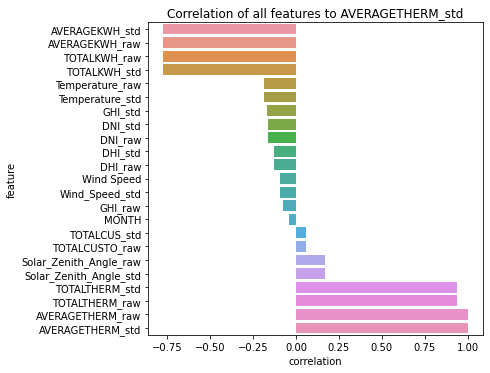

In [13]:
corr_vis(bay_area_monthly_pge_nrel, measurment_cols, meas='AVERAGETHERM_std')

In [64]:
def lag_by_zipcode(full_df, L, zipcode, desired_cols=['GHI', 'DHI', 'DNI', 'Wind Speed', 'Temperature_raw', 'Solar_Zenith_Angle_raw'],
                                       zip_col='zip',
                                       time_col='DATE'):
    subsetted_zip = full_df[full_df[zip_col] == zipcode].sort_values(by=time_col)

    ## Lag for the columns we want
    additional_columns = []
    for lag in range(1,L+1):
        for c in desired_cols:
            new_col_name = c + " lag l=%i"%(lag)
            additional_columns.append(new_col_name)
            subsetted_zip[new_col_name] = subsetted_zip[c].shift(lag).tolist()
    
#     print(merged.columns)
    return subsetted_zip

    

In [30]:
bay_area_monthly_pge_nrel.columns

Index(['Unnamed: 0', 'zip', 'city', 'state', 'latitude', 'longitude',
       'timezone', 'dst', 'ZIPCODE', 'DATE', 'MONTH', 'YEAR', 'DAY',
       'CUSTOMERCL', 'COMBINED', 'TOTALCUSTO', 'TOTALKWH', 'AVERAGEKWH',
       'TOTALTHERM', 'AVERAGETHE', 'Calculated', 'Calculat_1', 'AVGKWH Dif',
       'AVGTHERMS', 'Month_1', 'Year_1', 'GHI', 'DHI', 'DNI', 'Wind Speed',
       'Temperature_raw', 'Solar_Zenith_Angle_raw', 'zipcode_1', 'latitude_y',
       'longitud_1', 'geometry'],
      dtype='object')

In [53]:
X_cols = ['MONTH','YEAR', 'GHI', 'DHI', 'DNI', 'Wind Speed', 'Temperature_raw', 'Solar_Zenith_Angle_raw' ]
bay_area_monthly_elec_pge_nrel = bay_area_monthly_pge_nrel[bay_area_monthly_pge_nrel['TOTALTHERM']==0].drop_duplicates()

## Cutting out using our engineering judgement
bay_area_monthly_elec_pge_nrel = bay_area_monthly_elec_pge_nrel[bay_area_monthly_elec_pge_nrel['zip'] != 94301] ## Cut out Palo Alto, which only has 16 measurements
bay_area_monthly_elec_pge_nrel = bay_area_monthly_elec_pge_nrel[bay_area_monthly_elec_pge_nrel['zip'] != 94035] ## Cut out Mountain View which only has 16 measurements

bay_area_monthly_elec_pge_nrel_clean = bay_area_monthly_elec_pge_nrel#[bay_area_monthly_elec_pge_nrel['TOTALKWH_std'] < 10]




In [54]:
bay_area_monthly_elec_pge_nrel_clean.columns

Index(['Unnamed: 0', 'zip', 'city', 'state', 'latitude', 'longitude',
       'timezone', 'dst', 'ZIPCODE', 'DATE', 'MONTH', 'YEAR', 'DAY',
       'CUSTOMERCL', 'COMBINED', 'TOTALCUSTO', 'TOTALKWH', 'AVERAGEKWH',
       'TOTALTHERM', 'AVERAGETHE', 'Calculated', 'Calculat_1', 'AVGKWH Dif',
       'AVGTHERMS', 'Month_1', 'Year_1', 'GHI', 'DHI', 'DNI', 'Wind Speed',
       'Temperature_raw', 'Solar_Zenith_Angle_raw', 'zipcode_1', 'latitude_y',
       'longitud_1', 'geometry'],
      dtype='object')

In [67]:
# desired_cols = ['Temperature_raw', 'Wind Speed', 'GHI', 'DNI']
# L=3
# for lag in range(1,L+1):
#     for c in desired_cols:
#         new_col_name = c + " lag l=%i"%(lag)
#         bay_area_monthly_elec_pge_nrel_clean[new_col_name] = [np.nan]*len(bay_area_monthly_elec_pge_nrel_clean)
    
## lag for the columns we want
concatted = pd.DataFrame()
i = 1
for zipcode in sorted(bay_area_monthly_elec_pge_nrel_clean['zip'].unique()):
    print(i, " : ", zipcode)
    to_concat = lag_by_zipcode(bay_area_monthly_elec_pge_nrel_clean, 3, zipcode, zip_col='zip', time_col='DATE')
    concatted = pd.concat([concatted, to_concat])
    concatted.to_csv('cleaned_data/lagged/test.csv')
    i+=1

1  :  94002
2  :  94005
3  :  94010
4  :  94014
5  :  94015
6  :  94018
7  :  94019
8  :  94020
9  :  94021
10  :  94022
11  :  94024
12  :  94025
13  :  94027
14  :  94028
15  :  94030
16  :  94037
17  :  94038
18  :  94040
19  :  94041
20  :  94043
21  :  94044
22  :  94060
23  :  94061
24  :  94062
25  :  94063
26  :  94065
27  :  94066
28  :  94070
29  :  94074
30  :  94080
31  :  94085
32  :  94086
33  :  94087
34  :  94089
35  :  94102
36  :  94103
37  :  94104
38  :  94105
39  :  94107
40  :  94108
41  :  94109
42  :  94110
43  :  94111
44  :  94112
45  :  94114
46  :  94115
47  :  94116
48  :  94117
49  :  94118
50  :  94121
51  :  94122
52  :  94123
53  :  94124
54  :  94127
55  :  94129
56  :  94130
57  :  94131
58  :  94132
59  :  94133
60  :  94134
61  :  94158
62  :  94303
63  :  94305
64  :  94306
65  :  94401
66  :  94402
67  :  94403
68  :  94404
69  :  94503
70  :  94505
71  :  94506
72  :  94507
73  :  94508
74  :  94509
75  :  94510
76  :  94511
77  :  94512
78  :  9

In [72]:
L=3
lagged_bame_pnc = pd.read_csv('cleaned_data/DEEPNOTE_CREATED_lagged_{L}_BA-monthly-elec-pge-nrel-clean.csv'.format(L=L))
lagged_bame_pnc_dropna = lagged_bame_pnc.dropna()
lagged_bame_pnc_dropna.columns

Index(['Unnamed: 0', 'zip', 'city', 'state', 'latitude', 'longitude',
       'timezone', 'dst', 'DATE', 'MONTH', 'YEAR', 'DAY', 'CUSTOMERCL',
       'COMBINED', 'TOTALCUSTO_raw', 'TOTALKWH_raw', 'AVERAGEKWH_raw',
       'TOTALTHERM_raw', 'AVERAGETHERM_raw', 'GHI_raw', 'DHI_raw', 'DNI_raw',
       'Wind Speed', 'Temperature_raw', 'Solar_Zenith_Angle_raw',
       'TOTALCUS_std', 'TOTALKWH_std', 'AVERAGEKWH_std', 'TOTALTHERM_std',
       'AVERAGETHERM_std', 'GHI_std', 'DHI_std', 'DNI_std', 'Wind_Speed_std',
       'Temperature_std', 'Solar_Zenith_Angle_std', 'geometry',
       'TOTALKWH_raw lag l=1', 'AVERAGEKWH_raw lag l=1', 'GHI_raw lag l=1',
       'DHI_raw lag l=1', 'DNI_raw lag l=1', 'Wind Speed lag l=1',
       'Temperature_raw lag l=1', 'Solar_Zenith_Angle_raw lag l=1',
       'TOTALKWH_raw lag l=2', 'AVERAGEKWH_raw lag l=2', 'GHI_raw lag l=2',
       'DHI_raw lag l=2', 'DNI_raw lag l=2', 'Wind Speed lag l=2',
       'Temperature_raw lag l=2', 'Solar_Zenith_Angle_raw lag l=2',
    

In [152]:
lagged_bame_pnc_dropna

,Unnamed: 0,zip,city,state,latitude,longitude,timezone,dst,DATE,MONTH,...,Temperature_raw lag l=2,Solar_Zenith_Angle_raw lag l=2,TOTALKWH_raw lag l=3,AVERAGEKWH_raw lag l=3,GHI_raw lag l=3,DHI_raw lag l=3,DNI_raw lag l=3,Wind Speed lag l=3,Temperature_raw lag l=3,Solar_Zenith_Angle_raw lag l=3
3,101096,94002,Belmont,CA,37.516687,-122.29026,-8,1,2013-04-01,4,...,9.815476,99.517798,5819025.0,555.0,118.551075,30.461022,220.584677,3.564247,9.044355,105.478320
4,101097,94002,Belmont,CA,37.516687,-122.29026,-8,1,2013-05-01,5,...,11.181452,91.103266,4789653.0,456.0,166.961310,39.181548,269.005952,3.429167,9.815476,99.517798
5,101098,94002,Belmont,CA,37.516687,-122.29026,-8,1,2013-06-01,6,...,12.713889,82.265542,4779129.0,455.0,195.715054,71.255376,216.329301,3.340323,11.181452,91.103266
6,101102,94002,Belmont,CA,37.516687,-122.29026,-8,1,2013-07-01,7,...,13.991935,75.565403,4269778.0,407.0,284.418056,64.431944,334.995833,3.858194,12.713889,82.265542
7,101103,94002,Belmont,CA,37.516687,-122.29026,-8,1,2013-08-01,8,...,15.365278,72.629139,4277071.0,407.0,311.571237,71.837366,346.986559,4.352151,13.991935,75.565403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29849,101737,95823,Sacramento,CA,38.477508,-121.44561,-8,1,2019-08-01,8,...,22.570694,72.380556,0.0,0.0,291.157258,80.665323,304.579301,2.085349,15.795699,75.438011
29850,101738,95823,Sacramento,CA,38.477508,-121.44561,-8,1,2019-09-01,9,...,24.598387,73.865511,0.0,0.0,355.137500,61.156944,423.895833,2.166111,22.570694,72.380556
29851,101742,95823,Sacramento,CA,38.477508,-121.44561,-8,1,2019-10-01,10,...,26.016398,79.562581,0.0,0.0,347.825269,54.220430,431.807796,2.469355,24.598387,73.865511
29852,101743,95823,Sacramento,CA,38.477508,-121.44561,-8,1,2019-11-01,11,...,22.992500,87.911556,0.0,0.0,311.934140,50.989247,397.525538,2.254704,26.016398,79.562581


In [73]:
## targetted_y can be changed to predict other values,
targetted_y = 'AVERAGEKWH_raw'
elec_Y_train = lagged_bame_pnc_dropna[targetted_y]

## Last step before passing data to our model (what to include)
X_cols = ['MONTH','YEAR', 'AVERAGEKWH_raw lag l=1', 'GHI_raw lag l=1',
       'DHI_raw lag l=1', 'DNI_raw lag l=1', 'Wind Speed lag l=1',
       'Temperature_raw lag l=1', 'Solar_Zenith_Angle_raw lag l=1',
        'AVERAGEKWH_raw lag l=2', 'GHI_raw lag l=2',
       'DHI_raw lag l=2', 'DNI_raw lag l=2', 'Wind Speed lag l=2',
       'Temperature_raw lag l=2', 'Solar_Zenith_Angle_raw lag l=2',
        'AVERAGEKWH_raw lag l=3', 'GHI_raw lag l=3',
       'DHI_raw lag l=3', 'DNI_raw lag l=3', 'Wind Speed lag l=3',
       'Temperature_raw lag l=3', 'Solar_Zenith_Angle_raw lag l=3' ]
elec_X_train = lagged_bame_pnc_dropna[X_cols]

$ \Sigma $

In [75]:
elec_X_train.head()

,MONTH,YEAR,AVERAGEKWH_raw lag l=1,GHI_raw lag l=1,DHI_raw lag l=1,DNI_raw lag l=1,Wind Speed lag l=1,Temperature_raw lag l=1,Solar_Zenith_Angle_raw lag l=1,AVERAGEKWH_raw lag l=2,...,Wind Speed lag l=2,Temperature_raw lag l=2,Solar_Zenith_Angle_raw lag l=2,AVERAGEKWH_raw lag l=3,GHI_raw lag l=3,DHI_raw lag l=3,DNI_raw lag l=3,Wind Speed lag l=3,Temperature_raw lag l=3,Solar_Zenith_Angle_raw lag l=3
3,4,2013,455.0,195.715054,71.255376,216.329301,3.340323,11.181452,91.103266,456.0,...,3.429167,9.815476,99.517798,555.0,118.551075,30.461022,220.584677,3.564247,9.044355,105.478320
4,5,2013,407.0,284.418056,64.431944,334.995833,3.858194,12.713889,82.265542,455.0,...,3.340323,11.181452,91.103266,456.0,166.961310,39.181548,269.005952,3.429167,9.815476,99.517798
5,6,2013,407.0,311.571237,71.837366,346.986559,4.352151,13.991935,75.565403,407.0,...,3.858194,12.713889,82.265542,455.0,195.715054,71.255376,216.329301,3.340323,11.181452,91.103266
6,7,2013,400.0,325.868056,65.134722,376.461111,3.938611,15.365278,72.629139,407.0,...,4.352151,13.991935,75.565403,407.0,284.418056,64.431944,334.995833,3.858194,12.713889,82.265542
7,8,2013,405.0,326.348118,68.268817,372.724462,3.209946,16.071237,74.152984,400.0,...,3.938611,15.365278,72.629139,407.0,311.571237,71.837366,346.986559,4.352151,13.991935,75.565403


In [76]:
elec_Y_train.mean()

460.5667853808651

In [77]:
bay_area_monthly_elec_pge_nrel_clean.describe()

,Unnamed: 0,zip,latitude,longitude,timezone,dst,ZIPCODE,MONTH,YEAR,DAY,...,Year_1,GHI,DHI,DNI,Wind Speed,Temperature_raw,Solar_Zenith_Angle_raw,zipcode_1,latitude_y,longitud_1
count,30637.000000,30637.000000,30637.000000,30637.000000,30637.0,30637.0,30637.000000,30637.000000,30637.000000,30637.0,...,30637.000000,30637.000000,30637.000000,30637.000000,30637.000000,30637.000000,30637.000000,30637.000000,30637.000000,30637.000000
mean,66576.082188,94738.439664,37.787620,-122.193877,-8.0,1.0,94738.439664,6.480008,2015.783823,1.0,...,2015.783823,211.340414,54.929103,267.962873,2.269510,14.558151,90.017936,94738.439664,37.787620,-122.193877
std,40879.113938,459.768287,0.409873,0.356660,0.0,0.0,459.768287,3.484775,2.020631,0.0,...,2.020631,85.376567,18.334170,81.156049,0.743105,3.919111,12.288461,459.768287,0.409873,0.356660
min,94.000000,94002.000000,36.922902,-123.229380,-8.0,1.0,94002.000000,1.000000,2013.000000,1.0,...,2013.000000,61.404570,23.349462,83.014785,0.857796,2.677419,72.349778,94002.000000,36.922902,-123.229380
25%,30627.000000,94512.000000,37.449888,-122.430100,-8.0,1.0,94512.000000,3.000000,2014.000000,1.0,...,2014.000000,123.543056,37.686111,212.278274,1.750403,11.613889,79.624583,94512.000000,37.449888,-122.430100
50%,66048.000000,94613.000000,37.792678,-122.189940,-8.0,1.0,94613.000000,6.000000,2016.000000,1.0,...,2016.000000,202.803763,55.052778,266.959677,2.182661,14.028226,91.035081,94613.000000,37.792678,-122.189940
75%,101186.000000,95060.000000,38.031271,-121.950720,-8.0,1.0,95060.000000,10.000000,2018.000000,1.0,...,2018.000000,286.689516,69.102778,331.344444,2.677151,17.709409,103.945292,95060.000000,38.031271,-121.950720
max,136682.000000,95823.000000,38.592155,-121.400220,-8.0,1.0,95823.000000,12.000000,2019.000000,1.0,...,2019.000000,367.051389,131.197581,469.650538,5.556250,27.495296,107.560040,95823.000000,38.592155,-121.400220


In [78]:
 plt.plot(bay_area_monthly_elec_pge_nrel['TOTALKWH_std'])
#keep this plot!! shows why we got rid of the data (and make prettier)
 #plt.plot(bay_area_monthly_elec_pge_nrel_clean['TOTALKWH_std']) #add this plot to it side by side to show
 

KeyError: 'TOTALKWH_std'

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TOTALKWH_std', ylabel='Density'>

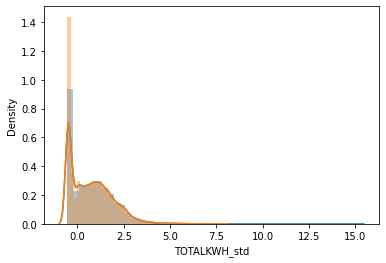

In [ ]:
sns.distplot(bay_area_monthly_elec_pge_nrel['TOTALKWH_std'])
sns.distplot(bay_area_monthly_elec_pge_nrel_clean['TOTALKWH_std'])


In [80]:
## Trainv-validation split 
X_train, X_val, y_train, y_val = train_test_split(elec_X_train,elec_Y_train,test_size=0.2,
                                                  random_state=0)



In [81]:
info(X_train)

Type:  <class 'pandas.core.frame.DataFrame'>
Shape:  (23136, 23)
Columns:  Index(['MONTH', 'YEAR', 'AVERAGEKWH_raw lag l=1', 'GHI_raw lag l=1',
       'DHI_raw lag l=1', 'DNI_raw lag l=1', 'Wind Speed lag l=1',
       'Temperature_raw lag l=1', 'Solar_Zenith_Angle_raw lag l=1',
       'AVERAGEKWH_raw lag l=2', 'GHI_raw lag l=2', 'DHI_raw lag l=2',
       'DNI_raw lag l=2', 'Wind Speed lag l=2', 'Temperature_raw lag l=2',
       'Solar_Zenith_Angle_raw lag l=2', 'AVERAGEKWH_raw lag l=3',
       'GHI_raw lag l=3', 'DHI_raw lag l=3', 'DNI_raw lag l=3',
       'Wind Speed lag l=3', 'Temperature_raw lag l=3',
       'Solar_Zenith_Angle_raw lag l=3'],
      dtype='object')


,MONTH,YEAR,AVERAGEKWH_raw lag l=1,GHI_raw lag l=1,DHI_raw lag l=1,DNI_raw lag l=1,Wind Speed lag l=1,Temperature_raw lag l=1,Solar_Zenith_Angle_raw lag l=1,AVERAGEKWH_raw lag l=2,...,Wind Speed lag l=2,Temperature_raw lag l=2,Solar_Zenith_Angle_raw lag l=2,AVERAGEKWH_raw lag l=3,GHI_raw lag l=3,DHI_raw lag l=3,DNI_raw lag l=3,Wind Speed lag l=3,Temperature_raw lag l=3,Solar_Zenith_Angle_raw lag l=3
20008,12,2014,0.0,110.697222,34.406944,183.043056,1.852500,13.701389,104.182097,0.0,...,1.835484,17.622312,96.956559,0.0,216.601389,63.559722,253.144444,1.744444,18.408333,87.993903
8451,6,2013,1167.0,314.283602,70.405914,359.475806,3.526210,15.475806,75.501868,1090.0,...,3.116944,13.383333,82.233444,1133.0,202.311828,68.474462,234.236559,2.175403,10.440860,91.107675
6987,2,2019,1017.0,94.188172,36.360215,144.482527,1.969355,10.159409,105.581774,1120.0,...,1.743011,9.150941,107.330094,947.0,120.838889,36.163889,202.102778,1.850000,13.312083,104.075958
11767,10,2016,0.0,149.538978,44.819892,208.764785,2.316801,16.020161,97.074960,0.0,...,3.045139,19.136111,88.153444,0.0,242.236111,58.045833,318.997222,3.045139,19.136111,88.153444
6281,2,2015,448.0,112.368280,36.229839,193.422043,2.377823,11.928763,105.554032,442.0,...,3.945027,13.077957,107.291452,371.0,113.693056,38.620833,181.026389,2.644028,14.772222,104.037292


### Simple Linear Regression

$$ \hat{\vec{y}} = \hat{\vec\beta}*\vec{x}$$

Coefficients in $ \hat{\vec\beta}$  are simply scalars that are fit to the best-fit line. That is, simply solving least squares

$$ \hat{\vec\beta} = (X^TX)^{-1}X^TY$$


In [82]:
lm = LinearRegression() #linear regression
lm.fit(X_train, y_train)

## apply model to training data
lm_train_pred = lm.predict(X_train)
lm_train_mse = mean_squared_error(y_true=y_train, y_pred=lm_train_pred)

## apply model to test data
lm_test_pred = lm.predict(X_val)
lm_test_mse = mean_squared_error(y_true=y_val, y_pred=lm_test_pred)
print("Training MSE", lm_train_mse)
print("Testing MSE", lm_test_mse)

Training MSE 11512.800185165353
Testing MSE 12299.512755658494


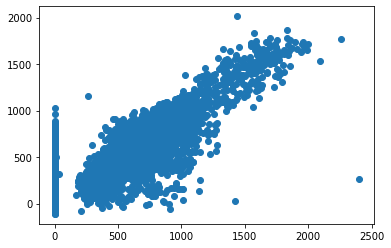

In [83]:
plt.scatter(y_train, lm_train_pred)

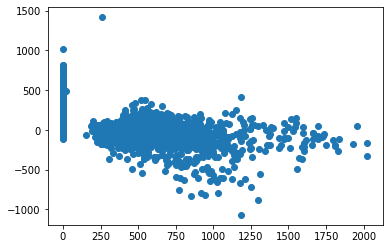

In [84]:
plt.scatter(y_val, lm_test_pred-y_val)

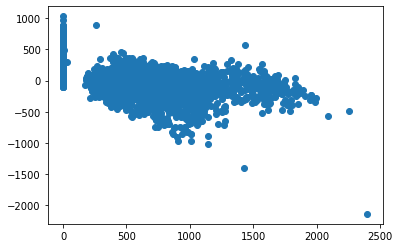

In [85]:
plt.scatter(y_train, lm_train_pred-y_train)

In [86]:
svr_regr = svm.SVR() #vector regression
svr_regr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [87]:
## apply model to training data
svr_train_pred = svr_regr.predict(X_train)
svr_train_mse = mean_squared_error(y_true=y_train, y_pred=svr_train_pred)

## apply model to test data
svr_test_pred = svr_regr.predict(X_val)
svr_test_mse = mean_squared_error(y_true=y_val, y_pred=svr_test_pred)
print("Training MSE", svr_train_mse)
print("Testing MSE", svr_test_mse)

Training MSE 60582.595558831046
Testing MSE 64781.677365511765


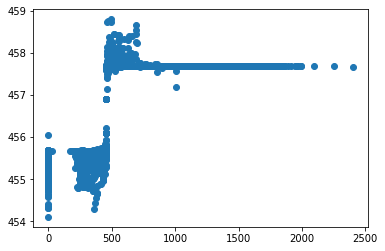

In [88]:
plt.scatter(y_train, svr_train_pred)

### Decision Tree Regression Model

In [ ]:
X_train.head()

,MONTH,YEAR,zip,GHI_raw,DHI_raw,DNI_raw,Wind Speed,Temperature_raw,Solar_Zenith_Angle_raw
73651,8,2019,94553,310.8225806451613,52.57258064516129,390.7110215053763,3.478360215053763,21.969758,79.630511
105904,3,2016,94940,169.7701612903226,59.166666666666664,192.32930107526883,4.809543010752688,12.182796,91.029530
12682,5,2013,95041,319.7204301075269,70.51344086021506,356.9623655913978,1.1791666666666678,14.376344,75.661573
50030,2,2015,94038,142.48958333333334,42.811011904761905,209.26934523809524,3.3116071428571443,13.616071,99.641830
14991,3,2018,95017,176.4959677419355,59.86021505376344,205.48924731182797,3.0182795698924756,11.216667,91.141855


In [89]:
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.13,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')

In [90]:
## apply model to training data
dtree_train_pred = dtree.predict(X_train)
dtree_train_mse = mean_squared_error(y_true=y_train, y_pred=dtree_train_pred)

## apply model to test data
dtree_test_pred = dtree.predict(X_val)
dtree_test_mse = mean_squared_error(y_true=y_val, y_pred=dtree_test_pred)
print("Training MSE", dtree_train_mse)
print("Testing MSE", dtree_test_mse)

Training MSE 22361.924219788987
Testing MSE 24123.35503044352


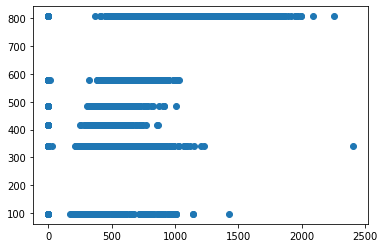

In [91]:
plt.scatter(y_train, dtree_train_pred)

In [ ]:
### Standardized SVR

In [92]:
pipe = Pipeline([('scaler', StandardScaler()), ('svr', svm.SVR())])

pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

In [93]:
pipe.score(X_val, y_val)

0.6490513045152971

In [98]:
pipe.score(X_train, y_train)

0.6639073112210159

## KNN (K Nearest Neighbors)

In [136]:
len(X_train.columns)

23

In [147]:
neigh = KNeighborsRegressor(n_neighbors=10, weights='distance')
neigh.fit(X_train, y_train)

neigh_train_pred = neigh.predict(X_train)
neigh_test_pred = neigh.predict(X_val)


In [148]:
print('Training MSE: ', mean_squared_error(neigh_train_pred, y_train))
print('Testing MSE: ', mean_squared_error(neigh_test_pred, y_val))


Training MSE:  0.0
Testing MSE:  5243.805577161207


In [185]:
plotting_train = X_train.copy()
plotting_train['True y'] = y_train

plotting_test = X_val.copy()
plotting_test['True y'] = y_val

plotting_train['DAY'] = [1]*len(plotting_train)
plotting_test['DAY'] = [1]*len(plotting_test)

plotting_train['date'] = pd.to_datetime((plotting_train.YEAR*10000+plotting_train.MONTH*100+plotting_train.DAY).apply(str),format='%Y%m%d')
plotting_test['date'] = pd.to_datetime((plotting_test.YEAR*10000+plotting_test.MONTH*100+plotting_test.DAY).apply(str),format='%Y%m%d')

In [187]:
plotting_train['Linear Model pred'] = lm_train_pred
plotting_train['SVR pred'] = svr_train_pred
plotting_train['KNN pred'] = neigh_train_pred
plotting_train['DTree pred'] = dtree_train_pred

plotting_test['Linear Model pred'] = lm_test_pred
plotting_test['SVR pred'] = svr_test_pred
plotting_test['KNN pred'] = neigh_test_pred
plotting_test['DTree pred'] = dtree_test_pred

In [188]:
plotting_test.head()

,MONTH,YEAR,AVERAGEKWH_raw lag l=1,GHI_raw lag l=1,DHI_raw lag l=1,DNI_raw lag l=1,Wind Speed lag l=1,Temperature_raw lag l=1,Solar_Zenith_Angle_raw lag l=1,AVERAGEKWH_raw lag l=2,...,Wind Speed lag l=3,Temperature_raw lag l=3,Solar_Zenith_Angle_raw lag l=3,True y,DAY,date,Linear Model pred,SVR pred,KNN pred,DTree pred
5274,8,2014,0.0,294.193548,77.986559,303.412634,2.130645,17.864247,74.062030,0.0,...,2.526478,15.330645,75.549825,0,1,2014-08-01,23.311169,456.674399,0.000000,96.772862
18332,6,2016,407.0,299.122312,82.557796,317.692204,2.183871,14.233871,75.441223,404.0,...,2.633602,12.008065,91.026586,398,1,2016-06-01,370.627227,456.675099,447.785428,415.709032
2865,1,2014,525.0,114.837366,27.061828,240.206989,1.479973,9.030914,107.248266,530.0,...,1.466528,13.306944,104.042111,451,1,2014-01-01,489.374084,456.675687,444.112767,485.993373
17426,10,2014,421.0,196.519444,68.565278,217.508333,1.744444,18.512500,87.993889,482.0,...,1.837500,18.569892,73.948091,453,1,2014-10-01,500.355014,456.675466,462.524884,415.709032
18408,9,2015,0.0,256.225806,73.870968,275.732527,3.392876,18.212366,79.622849,0.0,...,3.908611,15.923611,72.484042,0,1,2015-09-01,32.405703,456.675466,0.000000,96.772862


<Figure size 1080x576 with 0 Axes>

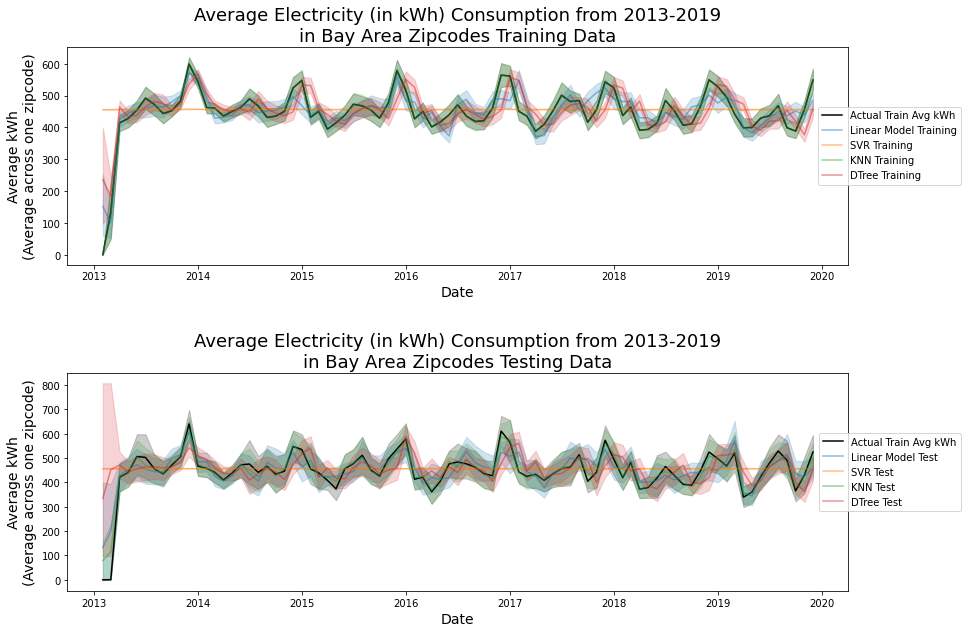

In [202]:
plt.figure(figsize=(15,8))

fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(14,10), gridspec_kw={'wspace':.5, 'hspace':.5})

models = ['Linear Model pred', 'SVR pred', 'KNN pred', 'DTree pred']
labels = ['Linear Model', 'SVR', 'KNN', 'DTree']

## Plotting Training Data
sns.lineplot(data=plotting_train, x='date', y='True y', label='Actual Train Avg kWh', ax=ax1, color='black')
for m, l in zip(models, labels):
    sns.lineplot(data=plotting_train, x='date', y=m, label=l + " Training", alpha=.5, ax=ax1)

ax1.legend(bbox_to_anchor=(1.15, .75))
ax1.set_title('Average Electricity (in kWh) Consumption from 2013-2019\nin Bay Area Zipcodes Training Data', size=18)
ax1.set_xlabel('Date',size=14)
ax1.set_ylabel('Average kWh\n(Average across one zipcode)', size=14)

## Plotting Testing Data
sns.lineplot(data=plotting_test, x='date', y='True y', label='Actual Train Avg kWh', ax=ax2, color='black')
for m, l in zip(models, labels):
    sns.lineplot(data=plotting_test, x='date', y=m, label=l + " Test", alpha=.5, ax=ax2)

ax2.set_title('Average Electricity (in kWh) Consumption from 2013-2019\nin Bay Area Zipcodes Testing Data', size=18)
ax2.set_xlabel('Date',size=14)
ax2.set_ylabel('Average kWh\n(Average across one zipcode)', size=14)
ax2.legend(bbox_to_anchor=(1.15, .75))


In [193]:
plotting_train

,MONTH,YEAR,AVERAGEKWH_raw lag l=1,GHI_raw lag l=1,DHI_raw lag l=1,DNI_raw lag l=1,Wind Speed lag l=1,Temperature_raw lag l=1,Solar_Zenith_Angle_raw lag l=1,AVERAGEKWH_raw lag l=2,...,Wind Speed lag l=3,Temperature_raw lag l=3,Solar_Zenith_Angle_raw lag l=3,True y,DAY,date,Linear Model pred,SVR pred,KNN pred,DTree pred
20008,12,2014,0.0,110.697222,34.406944,183.043056,1.852500,13.701389,104.182097,0.0,...,1.744444,18.408333,87.993903,0,1,2014-12-01,105.014490,455.675464,0.0,96.772862
8451,6,2013,1167.0,314.283602,70.405914,359.475806,3.526210,15.475806,75.501868,1090.0,...,2.175403,10.440860,91.107675,1325,1,2013-06-01,1136.859163,457.675466,1325.0,807.410366
6987,2,2019,1017.0,94.188172,36.360215,144.482527,1.969355,10.159409,105.581774,1120.0,...,1.850000,13.312083,104.075958,912,1,2019-02-01,991.232111,457.675466,912.0,807.410366
11767,10,2016,0.0,149.538978,44.819892,208.764785,2.316801,16.020161,97.074960,0.0,...,3.045139,19.136111,88.153444,0,1,2016-10-01,43.835856,455.674811,0.0,96.772862
6281,2,2015,448.0,112.368280,36.229839,193.422043,2.377823,11.928763,105.554032,442.0,...,2.644028,14.772222,104.037292,344,1,2015-02-01,314.598401,455.675466,344.0,485.993373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13543,3,2015,453.0,142.858631,44.659226,210.822917,1.880060,12.019345,99.687604,603.0,...,1.944489,10.681452,107.370417,440,1,2015-03-01,492.062294,455.675466,440.0,485.993373
20281,6,2014,431.0,322.208333,73.734722,348.970833,1.060972,17.261111,72.775472,441.0,...,1.072177,16.225806,75.717272,431,1,2014-06-01,459.294441,455.675466,431.0,415.709032
10157,2,2017,791.0,88.696237,32.221774,144.211022,2.369758,6.995968,105.551640,828.0,...,1.554722,12.115278,104.191458,633,1,2017-02-01,784.182388,457.675466,633.0,807.410366
11144,3,2014,1176.0,183.266129,58.829301,221.001344,1.576478,12.290323,91.189624,1204.0,...,1.408631,10.145833,99.694970,1165,1,2014-03-01,1105.633338,457.675466,1165.0,807.410366
